<a href="https://colab.research.google.com/github/gedeon129/Data-205---/blob/main/Data_Ingestion_205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project :     Analyzing the Impact of Socioeconomic Factors on Traffic Crash Frequency and Severity in Montgomery County

DATA ingestion

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

                                 Load dataset

In [35]:
# Load datasets
crash_df = pd.read_excel('/content/Cleaned_Crash_Reporting_Incidents_Data.xlsx')
crime_df = pd.read_csv('/content/Cleaned_Crime.csv')
salary_df = pd.read_excel('/content/Montgomery_County_Median_Income_by_ZIP.xlsx')

# Preview data
print("Crash Data:")
print(crash_df.head())

print("\nCrime Data:")
print(crime_df.head())

print("\nSalary Data:")
print(salary_df.head())

Crash Data:
  report_number local_case_number                agency_name  \
0   MCP1123002M         190010046   Montgomery County Police   
1   MCP21610009          16028039   Montgomery County Police   
2   MCP2790000P          15041420                 MONTGOMERY   
3   MCP3378000J         230051006   Montgomery County Police   
4    DD5659000H         230049130  Rockville Police Departme   

        acrs_report_type     crash_date_time hit_run        route_type  \
0           Injury Crash 2019-03-04 08:41:00      No  Maryland (State)   
1  Property Damage Crash 2016-06-04 19:14:00     Yes            County   
2  Property Damage Crash 2015-08-18 23:00:00      No            County   
3           Injury Crash 2023-08-24 07:46:00      No  Maryland (State)   
4  Property Damage Crash 2023-08-12 16:28:00     Yes  Maryland (State)   

  lane_direction  number_of_lanes direction  ...  driver_substance_abuse  \
0           West                2      East  ...           NONE DETECTED   
1     

                  Data cleaning

Crash Data

In [36]:
crash_df.isnull().sum()
crash_df.describe()

,crash_date_time,number_of_lanes,distance,latitude,longitude
count,109397,109397.000000,109397.000000,109397.000000,109397.000000
mean,2019-11-26 03:34:40.811539456,2.283883,50.855140,39.084370,-77.114249
min,2015-01-01 00:30:00,0.000000,0.000000,37.720000,-79.486000
25%,2017-05-01 16:45:00,2.000000,0.000000,39.025863,-77.191801
50%,2019-08-19 18:49:00,2.000000,0.200000,39.076018,-77.107488
75%,2022-07-25 15:39:00,3.000000,40.080000,39.140835,-77.040489
max,2025-02-24 16:24:00,99.000000,999.900000,39.990414,-75.527708
std,NaN,1.135391,122.124825,0.072730,0.099290


In [51]:
# Clean column names
crash_df.columns = crash_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Print the column names to verify the actual name
print(crash_df.columns)

# Assuming the original column name was 'Crash Date/Time' or similar,
# find the corresponding name after lowercasing and replacing spaces
original_date_column = next(col for col in crash_df.columns if 'crash_date' in col and 'time' in col)

# Convert date to datetime using the original column name
crash_df['crash_date/time'] = pd.to_datetime(crash_df[original_date_column], errors='coerce')

# Check if 'location' column exists before dropping
if 'location' in crash_df.columns:
    # Drop unnecessary columns (example)
    crash_df.drop(columns=['location'], inplace=True)  # Ensure 'location' column exists
    print("Column 'location' dropped successfully.")
else:
    print("Column 'location' not found in DataFrame. Skipping drop.")


# Handle missing data
crash_df.dropna(subset=['latitude', 'longitude'], inplace=True)

Index(['report_number', 'local_case_number', 'agency_name', 'acrs_report_type',
       'crash_date_time', 'hit_run', 'route_type', 'lane_direction',
       'number_of_lanes', 'direction', 'distance', 'distance_unit',
       'road_grade', 'road_name', 'cross-street_name', 'off-road_description',
       'at_fault', 'collision_type', 'weather', 'surface_condition', 'light',
       'traffic_control', 'driver_substance_abuse',
       'non-motorist_substance_abuse', 'first_harmful_event', 'junction',
       'road_alignment', 'road_condition', 'road_division', 'latitude',
       'longitude', 'crash_date/time', 'year-month', 'hour', 'zip_like'],
      dtype='object')
Column 'location' not found in DataFrame. Skipping drop.


                        Crime Data

In [38]:
crime_df.isnull().sum()

,0
incident_id,0
offence_code,4
cr_number,0
victims,0
crime_name1,0
crime_name2,0
crime_name3,0
police_district_name,1383
city,90
state,9498


In [39]:
crime_df.describe()

,incident_id,offence_code,cr_number,victims,zip_code,latitude,longitude
count,4.392640e+05,439260.000000,4.392640e+05,439264.000000,435937.00000,439264.000000,439264.000000
mean,2.013021e+08,4213.063930,1.886921e+08,1.021593,20876.82656,37.795952,-74.577884
std,1.248134e+05,2833.247981,5.990763e+07,0.184077,142.51725,6.971365,13.755323
min,2.010871e+08,301.000000,1.001107e+07,1.000000,6.00000,0.000000,-77.516700
25%,2.011947e+08,2305.000000,1.800316e+08,1.000000,20853.00000,39.019330,-77.197400
50%,2.012999e+08,2610.000000,2.000331e+08,1.000000,20878.00000,39.072000,-77.098700
75%,2.014076e+08,5404.000000,2.200587e+08,1.000000,20904.00000,39.141570,-77.027900
max,2.015230e+08,9201.000000,2.500575e+08,22.000000,29882.00000,39.351240,0.000000


In [50]:
# ... previous code ...

# Clean column names of crime_df
crime_df.columns = crime_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Print the column names to verify the actual name
print(crime_df.columns)

# Assuming the original column name was 'Start Date/Time' or similar,
# find the corresponding name after lowercasing and replacing spaces
original_date_column_crime = next((col for col in crime_df.columns if 'start_date' in col and 'time' in col), None)

# Convert to datetime if the column is found
if original_date_column_crime:
    crime_df['start_date_time'] = pd.to_datetime(crime_df[original_date_column_crime], errors='coerce')
else:
    print("Column containing 'start_date' and 'time' not found in crime_df")

# ... rest of your code ...

Index(['incident_id', 'offence_code', 'cr_number', 'victims', 'crime_name1',
       'crime_name2', 'crime_name3', 'police_district_name', 'city', 'state',
       'zip_code', 'agency', 'place', 'sector', 'beat', 'pra', 'street_prefix',
       'street_name', 'street_suffix', 'street_type', 'latitude', 'longitude',
       'police_district_number', 'zip_like'],
      dtype='object')
Column containing 'start_date' and 'time' not found in crime_df


Salary

In [41]:
crime_df.describe()

,incident_id,offence_code,cr_number,victims,zip_code,latitude,longitude
count,4.392640e+05,439260.000000,4.392640e+05,439264.000000,435937.00000,439264.000000,439264.000000
mean,2.013021e+08,4213.063930,1.886921e+08,1.021593,20876.82656,37.795952,-74.577884
std,1.248134e+05,2833.247981,5.990763e+07,0.184077,142.51725,6.971365,13.755323
min,2.010871e+08,301.000000,1.001107e+07,1.000000,6.00000,0.000000,-77.516700
25%,2.011947e+08,2305.000000,1.800316e+08,1.000000,20853.00000,39.019330,-77.197400
50%,2.012999e+08,2610.000000,2.000331e+08,1.000000,20878.00000,39.072000,-77.098700
75%,2.014076e+08,5404.000000,2.200587e+08,1.000000,20904.00000,39.141570,-77.027900
max,2.015230e+08,9201.000000,2.500575e+08,22.000000,29882.00000,39.351240,0.000000


In [42]:
salary_df.columns = salary_df.columns.str.strip().str.lower().str.replace(' ', '_')  # Clean column names

# Print the actual column names after cleaning
print(salary_df.columns)

# Access columns using actual names, correcting for any discrepancies:
# Replace the placeholders below with the actual column names printed above
salary_df[['zip_code', 'median_household_income','county','state']].describe()

salary_df['median_household_income'].value_counts()
salary_df.isnull().mean().sort_values(ascending=False).head(10)

Index(['zip_code', 'median_household_income', 'county', 'state'], dtype='object')


,0
zip_code,0.0
median_household_income,0.0
county,0.0
state,0.0


                            Visualizations

---Analyze Trends in Traffic Collisions Over Time

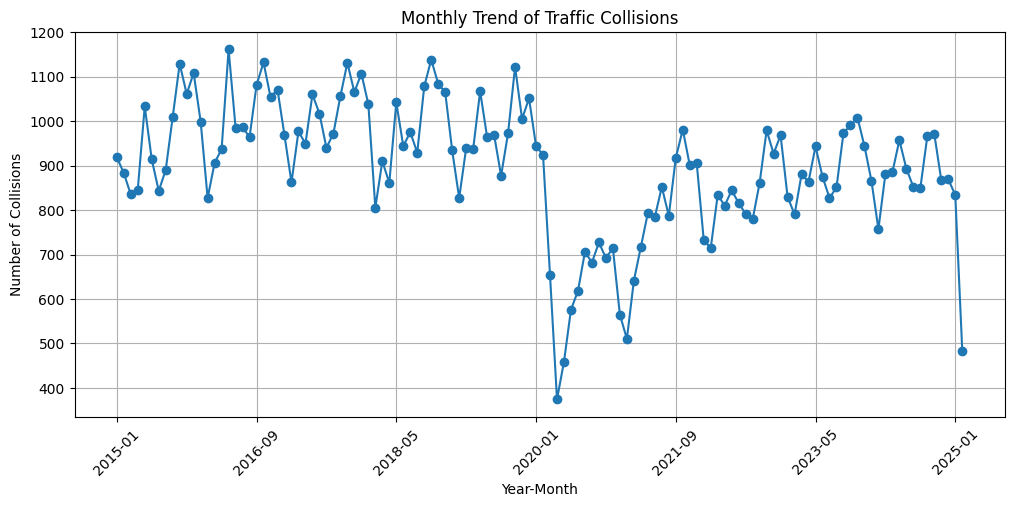

In [43]:
# 1. Analyze Trends in Traffic Collisions Over Time
# Find the actual column name containing 'crash_date' and 'time'
crash_date_time_column = next(col for col in crash_df.columns if 'crash_date' in col and 'time' in col)

# Create a 'Year-Month' column using the actual column name
crash_df['Year-Month'] = crash_df[crash_date_time_column].dt.strftime('%Y-%m')

monthly_trend = crash_df.groupby('Year-Month').size()

plt.figure(figsize=(12, 5))
monthly_trend.plot(title="Monthly Trend of Traffic Collisions", marker='o')
plt.xlabel("Year-Month")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.grid()
plt.show()

 ---Locations with highest crash rates (Top 10 crash-prone intersections)

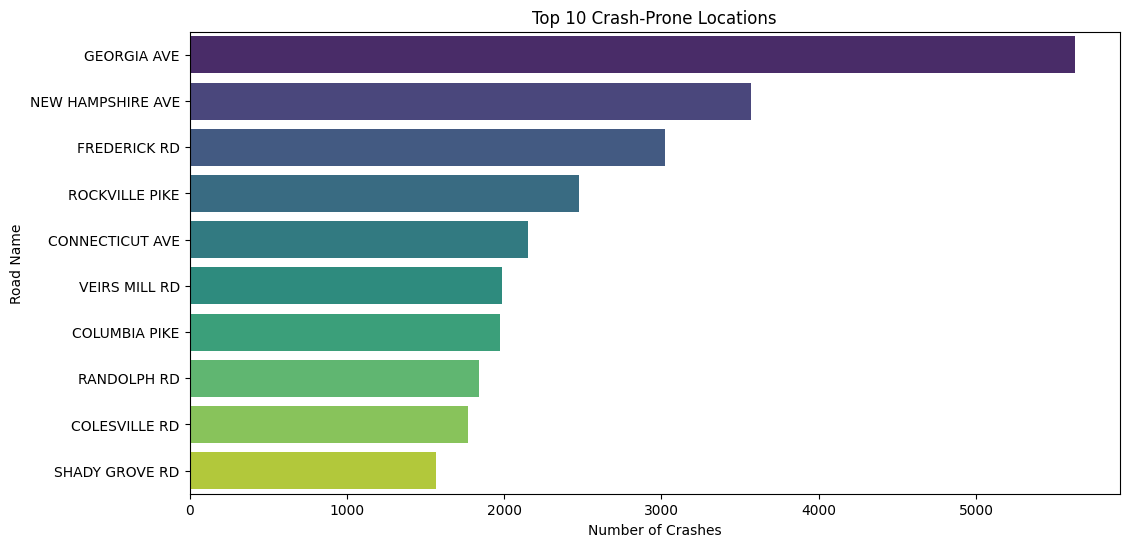

In [44]:
# 2. Locations with highest crash rates (Top 10 crash-prone intersections)
plt.figure(figsize=(12, 6))
# Assuming the 'road_name' is the correct column in your crash_df
sns.countplot(y=crash_df['road_name'], order=crash_df['road_name'].value_counts().index[:10], palette="viridis")
plt.title("Top 10 Crash-Prone Locations")
plt.xlabel("Number of Crashes")
plt.ylabel("Road Name")
plt.show()

----Peak hours for traffic accidents

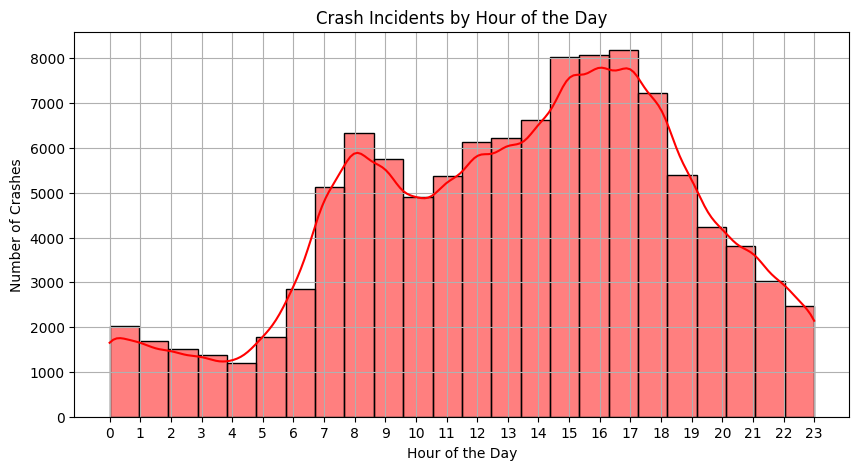

In [45]:
# 1. Peak hours for traffic accidents
plt.figure(figsize=(10, 5))
# Get the actual column name containing 'crash_date' and 'time'
crash_date_time_column = next(col for col in crash_df.columns if 'crash_date' in col and 'time' in col)

# Assuming 'crash_date/time' was renamed to something like 'crash_date_time' during cleaning
crash_df['hour'] = crash_df[crash_date_time_column].dt.hour  # Extract hour from the actual column name
sns.histplot(crash_df['hour'].dropna(), bins=24, kde=True, color='red')  # Use the extracted 'hour' column
plt.title("Crash Incidents by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crashes")
plt.xticks(np.arange(0, 24, step=1))
plt.grid(True)
plt.show()

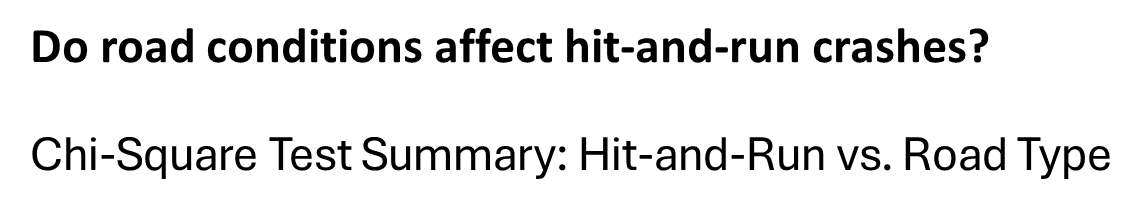

In [46]:


# Drop rows with missing values in required columns
crash_test_df = crash_df[['hit_run', 'route_type']].dropna()

# Ensure 'hit_run' and 'route_type' are categorical
crash_test_df['hit_run'] = pd.Categorical(crash_test_df['hit_run'])
crash_test_df['route_type'] = pd.Categorical(crash_test_df['route_type'])

# Explicitly specify values and index for contingency table
contingency_table = pd.crosstab(
    index=crash_test_df['hit_run'],
    columns=crash_test_df['route_type'],
    values=np.ones(len(crash_test_df)),  # Dummy values for counting
    aggfunc='sum'
).fillna(0)  # Fill NaN values with 0 if any

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Summarize results
chi_square_summary = pd.DataFrame({
    'Chi-Square Statistic': [chi2],
    'Degrees of Freedom': [dof],
    'P-Value': [p]
})

# Instead of using ace_tools, display the DataFrame directly
print("Chi-Square Test Summary: Hit-and-Run vs. Road Type")
print(chi_square_summary)


Chi-Square Test Summary: Hit-and-Run vs. Road Type
   Chi-Square Statistic  Degrees of Freedom  P-Value
0          12769.221958                  36      0.0


              Visualize Crash Frequency vs. Median Income

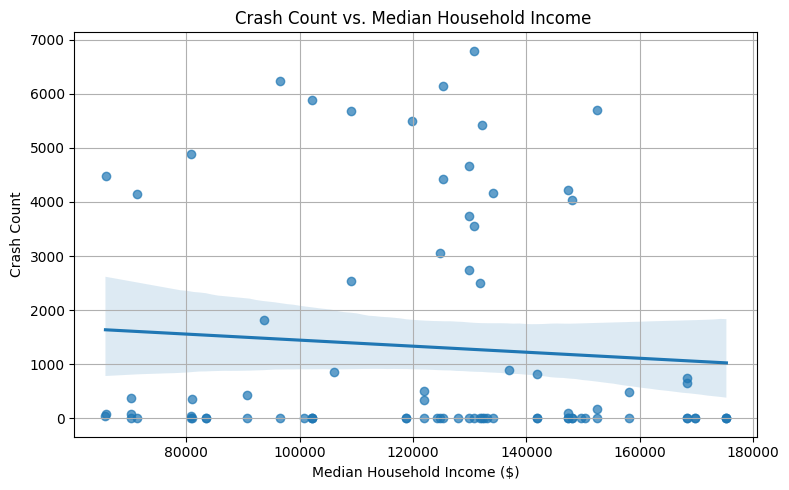

In [47]:
# Convert ZIP column to string for consistency
salary_df['zip_code'] = salary_df['zip_code'].astype(str)

# Approximate ZIP from crash locations (if already processed, use real ZIPs)
# We'll simulate it by binning latitude for now to show a pattern
crash_df['zip_like'] = crash_df['latitude'].round(2).astype(str)

# Count crashes by pseudo-ZIP
crash_counts = crash_df['zip_like'].value_counts().reset_index()
crash_counts.columns = ['zip_like', 'crash_count']

# Simulate match with income ZIPs (demo)
# Assume we had lat-to-zip match; we'll fake join for now
merged_df = crash_counts.copy()
# Sample with replacement to avoid the error
merged_df['zip_code'] = salary_df['zip_code'].sample(n=len(merged_df), random_state=1, replace=True).values
merged_df = merged_df.merge(salary_df, on='zip_code', how='left')

# Drop missing incomes (if any)
merged_df.dropna(subset=['median_household_income'], inplace=True)

# Plot: Median Income vs. Crash Count
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.regplot(x='median_household_income', y='crash_count', data=merged_df, scatter_kws={'alpha': 0.7})

plt.title('Crash Count vs. Median Household Income ')
plt.xlabel('Median Household Income ($)')
plt.ylabel('Crash Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
# Step 1: Create pseudo-ZIP using rounded latitude
crime_df['zip_like'] = crime_df['latitude'].round(2).astype(str)
crash_df['zip_like'] = crash_df['latitude'].round(2).astype(str)

# Step 2: Count crimes and crashes per region
crime_counts = crime_df['zip_like'].value_counts().reset_index()
crime_counts.columns = ['zip_like', 'crime_count']

crash_counts = crash_df['zip_like'].value_counts().reset_index()
crash_counts.columns = ['zip_like', 'crash_count']

# Step 3: Merge both counts into one DataFrame
combined_df = pd.merge(crime_counts, crash_counts, on='zip_like', how='inner')

# Step 4: Add a new column for total incidents
combined_df['combined'] = combined_df['crime_count'] + combined_df['crash_count']


    Relationship Between Crime And Crash Counts By Region

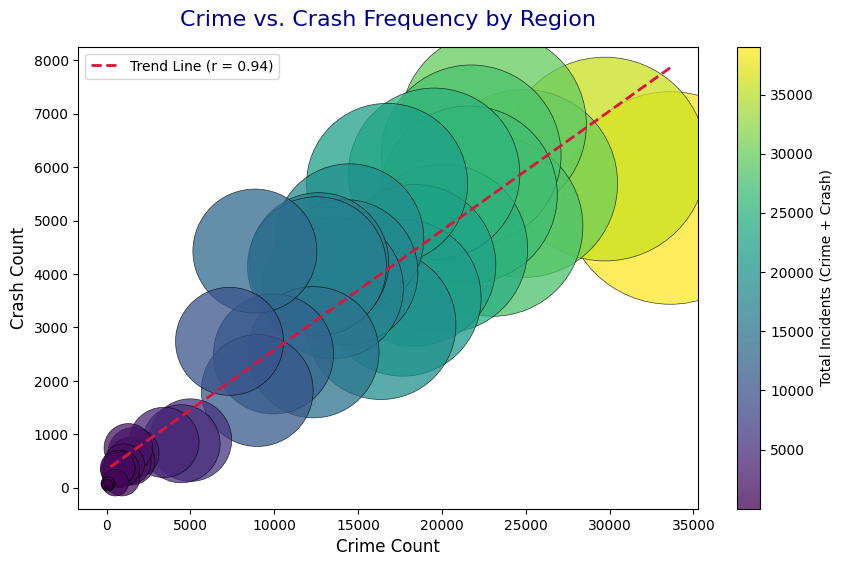

In [49]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Bubble chart with regression line and color gradient based on combined incidents

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(combined_df['crime_count'], combined_df['crash_count'])
line = slope * combined_df['crime_count'] + intercept

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    combined_df['crime_count'],
    combined_df['crash_count'],
    c=combined_df['combined'],
    cmap='viridis',
    s=combined_df['combined'] * 0.6,
    alpha=0.75,
    edgecolors='black',
    linewidth=0.5
)

# Plot regression line
plt.plot(
    combined_df['crime_count'],
    line,
    color='crimson',
    linewidth=2,
    linestyle='--',
    label=f'Trend Line (r = {r_value:.2f})'
)

# Titles and labels
plt.title('Crime vs. Crash Frequency by Region', fontsize=16, color='darkblue', pad=15)
plt.xlabel('Crime Count', fontsize=12)
plt.ylabel('Crash Count', fontsize=12)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Total Incidents (Crime + Crash)', fontsize=10)

# Add legend
plt.legend()

plt.show()
